<a href="https://colab.research.google.com/github/Vinnev/EDA-Capstone-Project-1/blob/main/Hotel_Booking_Analysis(Individual_)_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# importing pandas library

In [1]:
# importing pandas library
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# drive mounting

In [15]:
# drive mounting
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#CSV file location and uploading file

In [16]:
#Upload the data file to ColabNotebook
file_path = '/content/drive/MyDrive/Capstone project/Hotel Bookings.csv'
hotel_df = pd.read_csv(file_path)

# Data Exploration

In [17]:
hotel_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


### Observation:
Data set has total 119390 rows and 32 columns

In [18]:
# code to Access the first n rows(here 5) to check whether the object has right type of data in it.
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [19]:
# code to give the detail summary of a dataframe.
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

###  Observation from Info function:
we come to know that that there are 4 float64 dtypes, 16 int64 dtypes and 12 object dtypes

In [20]:
# code to copy the existing file to a new file. By this we have original file in unaltered form
df=hotel_df.copy()

# **Data Description:**
***hotel*** : Resort Hotel / City Hotel

***is_canceled***:if the booking was canceled- 1 / not - 0

***lead_time*** : No of days between the entering date of the booking into the PMS and the arrival date

***arrival_date_year*** : Year of arrival date

***arrival_date_month*** : Month of arrival date

***arrival_date_week_number*** : Week no of year for arrival date

***arrival_date_day_of_month*** : Day of arrival date

***stays_in_weekend_nights*** : No of weekend nights (Saturday / Sunday) the guest stayed / booked to stay at the hotel

***stays_in_week_nights*** : No of week nights (Monday to Friday) the guest stayed / booked to stay at the hotel

***adults*** : No of adults

***children*** : No of children

***babies*** : No of babies

***meal*** : Type of meal booked. 

***country*** : Country of origin.

***market_segment*** : Market segment designation. In categories, “TA” - “Travel Agents” and “TO” - “Tour Operators”

***distribution_channel*** : Booking distribution channel. “TA” - “Travel Agents” and “TO” - “Tour Operators”

***is_repeated_guest*** : tells whether the booking name was repeated guest -1 / not- 0

***previous_cancellations*** : No of previous bookings that were cancelled by customer prior to the current booking

***previous_bookings_not_canceled*** : No of previous bookings not cancelled by customer prior to the current booking

***reserved_room_type*** : Code of room type reserved.

***assigned_room_type*** : Code for the type of room assigned.

***booking_changes*** : No of changes made between booking till moment of check-in or cancellation

***deposit_type***: Tells customer made a deposit to guarantee the booking.

***agent*** : ID of the travel agency that made the booking

***company*** : ID of the company that made the booking 

***days_in_waiting_list*** : No of days the booking was in the waiting list before it got confirmed to customer

***customer_type*** : Type of customer

***adr*** : Average Daily Rate = sum of all lodging transactions/total number of staying nights

***required_car_parking_spaces*** : No of car parking spaces required 

***total_of_special_requests*** : No of special requests made by customer

***reservation_status*** : Reservation last status, assuming the below categories

*Canceled*  – customer canceled the booking

*Check-Out* – customer has checked in and departed also

*No-Show*   – customer did not check-in and did inform the hotel as well

***reservation_status_date*** : Date at which the last status was set. Can be combined with Reservation Status to get booking canceled or customer checked-out

##Data Cleaning

In [21]:
# returns the number of missing values in the data set 
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### Observation
Total there are 4 columns with missing value. Company has 112593, Agent has 16340 values, country has 488 values, children has 4 values.
Booking can also be done outside of agent and company.
Some booking will be there without children.


In [22]:
# code to fill 0 in missing place of agent, company, children 
null_columns=['agent','children','company']
for colm in null_columns:
  df[colm].fillna(0,inplace=True)

In [23]:
#returns the number of missing values in the data set. Done to cross check whether the column is updated with values
df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
company                             0
days_in_waiting_list                0
customer_typ

In [24]:
# Code to replace 4 values of country with others
df['country'].fillna('others',inplace=True)

In [25]:
# returns the number of missing values in the data set. 
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

### Observation
Removed all null/Nan/missing values from the data set.

In [26]:
# code to detect the duplications 
df.duplicated().value_counts()

False    87396
True     31994
dtype: int64

###Observation:
There are 31994 duplicated values and have to remove it

In [27]:
df= df.drop_duplicates()

In [28]:
df.shape

(87396, 32)

#Exploratory Data Analysis

##1)ADR with respect to market_segment

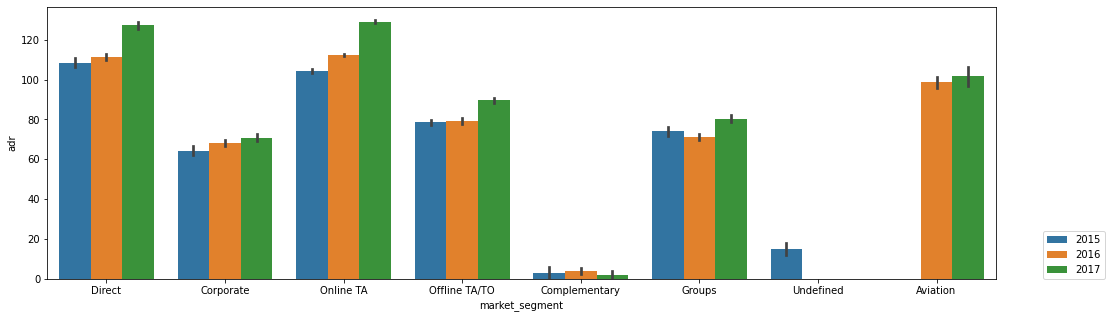

In [29]:
#ADR with respect to market_segment
plt.figure(figsize=(17,5))
sns.barplot(data=df, x='market_segment',y='adr',hue='arrival_date_year')
plt.legend(loc=(1.05,0))

###Observation:
1. Max ADR comes from Direct market and online TA in 3 years
2. Min ADR comes from Complementary and undefined market segment in the 3 years
3. Aviation though started from 2016 has better ADR with other market segment


##2)ADR with respect to distribution channel

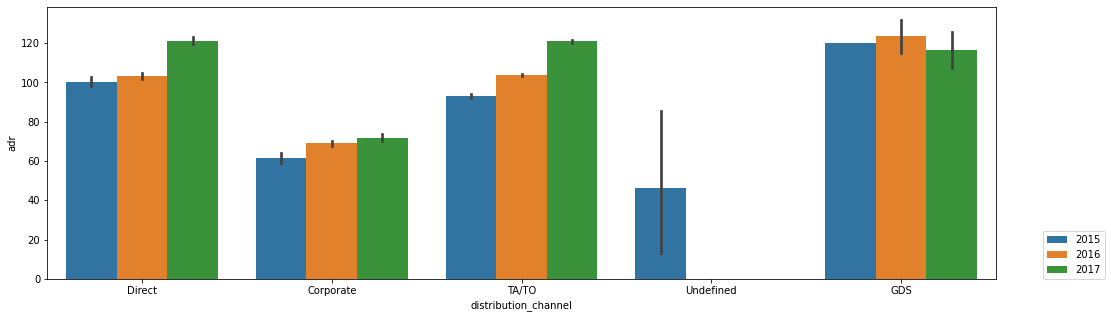

In [30]:
#ADR with respect to distribution channel
plt.figure(figsize=(17,5))
sns.barplot(data=df, x='distribution_channel',y='adr',hue='arrival_date_year')
plt.legend(loc=(1.05,0))

###Observation:
1. Max ADR comes from GDS(overall) except for year 2017.
2. Min ADR comes from Corporate and undefined channel in the 3 years

##3) Busiest Booking Month

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


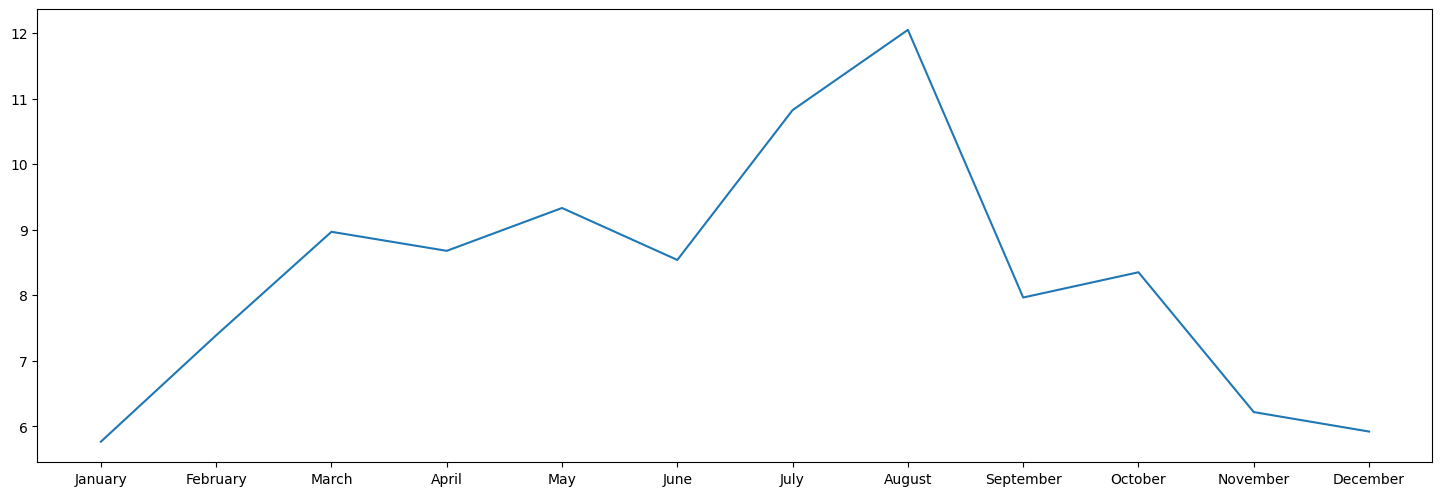

In [31]:
#Busiest Booking Month
      
hotel_no_cancel=df[df['is_canceled']==0]
import calendar
month_arranged=hotel_no_cancel['arrival_date_month'].value_counts().reindex(calendar.month_name[1:])
figures=plt.figure(figsize=(18,6),dpi=100)
x=month_arranged.index
y=month_arranged/month_arranged.sum()*100
sns.lineplot(x,y.values)

###Observation
1. Max Booking are done from the period of July to Mid-August in a calendar Year
2. Min Booking are done from the period of January - February and November - December
3. Booking are low in the start and end of a calendar year and it gradually increase and peaks at middle of a calendar year and then drops down.

##4) Distribution Channel with maximum booking

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


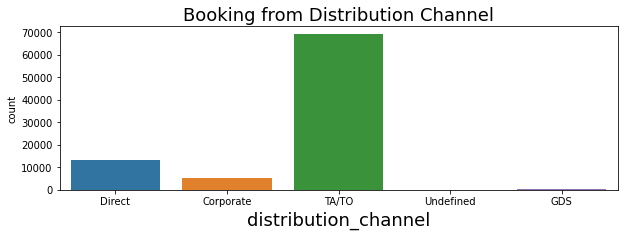

In [32]:
#Distribution Channel with maximum booking
distribution_chan = df['distribution_channel']
distribution_chan.dropna(inplace = True)
plt.figure(figsize=(10,3))
plt.title('Booking from Distribution Channel', fontsize=18)
plt.xlabel('xlabel',fontsize=18)
sns.countplot(df['distribution_channel'])

###Observation:
Max. Booking come from TA/TO and min. booking from Undefined and GDS Channel 

##5)Visualisation of duration of stays

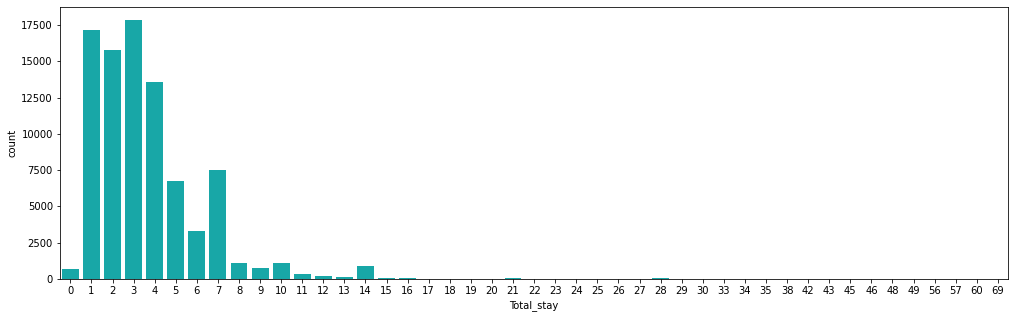

In [33]:
#visualisation of duration of stays
df[['stays_in_weekend_nights','stays_in_week_nights']]=df[['stays_in_weekend_nights','stays_in_week_nights']].astype('int64')
df['Total_stay']=df['stays_in_weekend_nights']+df['stays_in_week_nights']
plt.figure(figsize=(17,5))
sns.countplot(x=df['Total_stay'],color='c')
plt.show()

### Observation:
Most of the people stayed less than 5 days in the hotel and only few people stayed beyond 10 days.